# Proyek Analisis Data: [Bike Sharing]
- **Nama:** [Erlangga Nursyahbani]
- **Email:** [erlangganursyah@gmail.com]
- **ID Dicoding:** [Erlangga Nursyahbani]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Adakah Keterkaitan antara banyak penyewaan sepeda dengan musim ?
- Pertanyaan 2 : Apakah ada korelasi statistik yang signifikan antara suhu/kelembaban dengan jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [40]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from babel.numbers import format_currency
import seaborn as sns
%matplotlib inline


## Data Wrangling

### Gathering Data

membaca data .csv menggunakan library pandas as pd dengan method read_csv. Kemudian Tampilkan menggunakan .head()

In [41]:
day_data = pd.read_csv('../data/day.csv')
hour_data = pd.read_csv('../data/hour.csv')

day_data.head()
hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Jumlah Penyewaan pada kolom cnt yang terdiri dari casual + registered, hal ini berarti bahwa data ini penting makanya harus dipisah
- Waktu memiliki pengaruh seperti Year, Month,Hr, tampaknya hal ini dapat dianalisis terkait musim dan cuaca pada waktu terkait
- Pengaruh Cuaca, seperti Temp, hum, dan windspeed data ini dapat digunakan untuk analisis tingkat potensi penyewaan berdasarkan pada cuaca
- hari kerja dan hari libur yang memiliki andil berbeda, sekilas terlihat week day memiliki penyewaan yang mendominasi.

### Assessing Data

Melihat tipe data dari kedua data

In [42]:
day_data.info()
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

mencari apakan terdapat nilai nul dan menjumlahkannya

In [43]:
day_data.isnull().sum()
hour_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

memperlihatkan data secara kilas agar terlihat adakah anomali data

In [44]:
day_data.describe()
hour_data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


menghitung jumlah data yang terduplikasi

In [45]:
day_data.duplicated().sum()
hour_data.duplicated().sum()

np.int64(0)

**Insight:**
- No Missing Value (Yay)
- No Duplicate Data
- No Null Data
- Kolom dteday memiliki tipe object, yang mana seharusnya lebih baik untuk menjadikannya bertipe datetime
- terdapat jumlah kolom yang berbeda, day.csv memiliki 731 baris data dan hour.csv memiliki 17.379 baris data
- kolom cnt pada hour_data memiliki nilai min = 1, tetapi pada jam tertentu pengguna bisa memiliki nilai minimum 0, terdeteksi hal ini merupakan anomali data dan perlu di analisis lebih lanjut.

### Cleaning Data

mengubah tipe data dteday menjadi datetime agar lebih mudah dikelola

In [46]:
day_data['dteday'] = pd.to_datetime(day_data['dteday'])
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])

menampilkan hasil perubahan tipe data

In [47]:
day_data.info()
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- day-data sudah diubah menjadi datetime pada tipe datanya.
- hour_data sudah diubah menjadi datetime pada tipe datanya.

## Exploratory Data Analysis (EDA)

### Explore ...

Distribusi data penyewaan sepeda (cnt) histogram

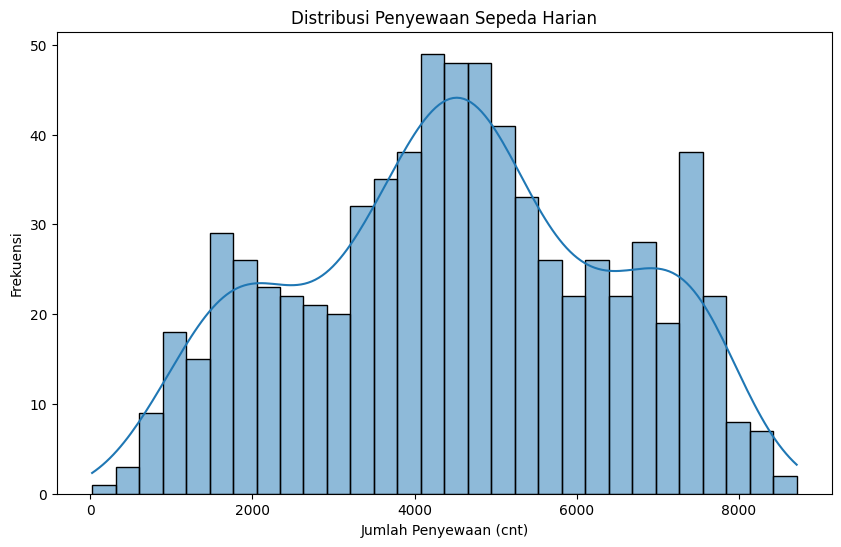

In [48]:

plt.figure(figsize=(10, 6))
sns.histplot(day_data['cnt'], bins=30, kde=True)
plt.title('Distribusi Penyewaan Sepeda Harian')
plt.xlabel('Jumlah Penyewaan (cnt)')
plt.ylabel('Frekuensi')

plt.show()

pengaruh musim terhadappenyewaan sepeda dengan tipe boxplot

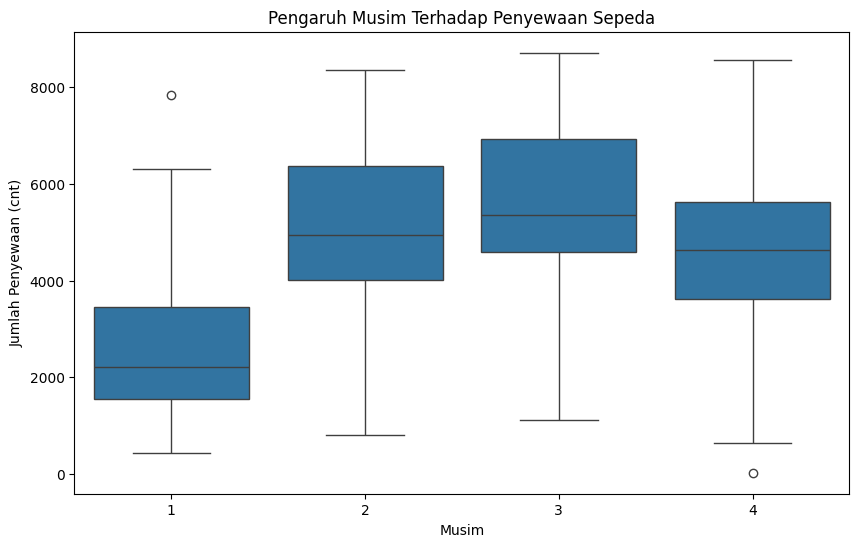

In [49]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=day_data)
plt.title('Pengaruh Musim Terhadap Penyewaan Sepeda')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan (cnt)')

plt.show()

hubungan cuaca dengan penyewaan sepeda boxplot

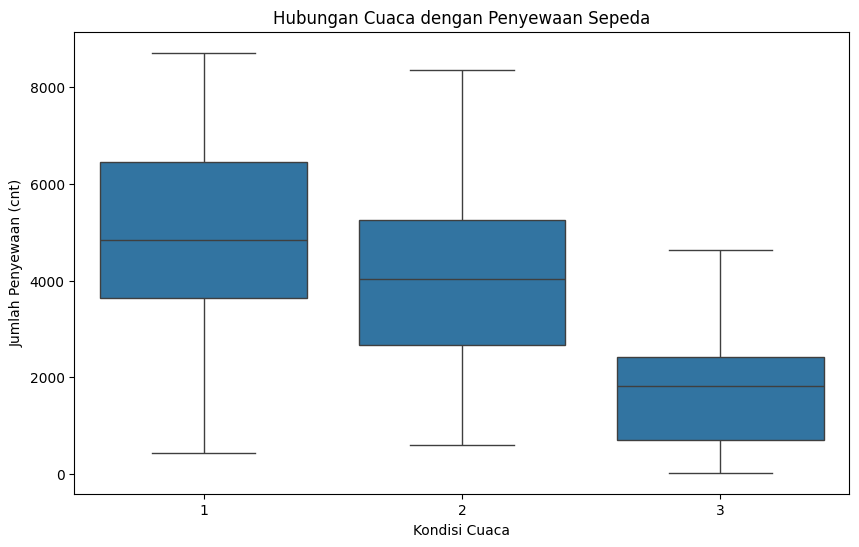

In [50]:
# Hubungan cuaca dengan penyewaan sepeda
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='cnt', data=day_data)
plt.title('Hubungan Cuaca dengan Penyewaan Sepeda')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Penyewaan (cnt)')

plt.show()

Pengaruh hari kerja terhadap penyewaan sepeda boxplot


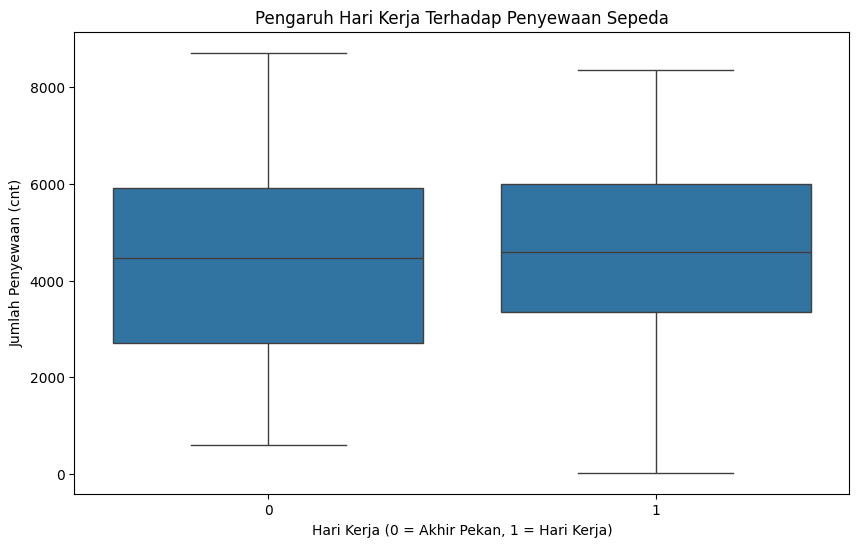

In [51]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='workingday', y='cnt', data=day_data)
plt.title('Pengaruh Hari Kerja Terhadap Penyewaan Sepeda')
plt.xlabel('Hari Kerja (0 = Akhir Pekan, 1 = Hari Kerja)')
plt.ylabel('Jumlah Penyewaan (cnt)')

plt.show()

**Insight**
- Permintaan cukup stabil dari hari ke hari
- memiliki fluktuatif terkait dengan musim dan cuaca
- distribusi normal

## Visualization & Explanatory Analysis

### Pertanyaan 1: Adakah Keterkaitan antara banyak penyewaan sepeda dengan musim ?

menampilkan distribusi penyewaan sepeda berdasarkan musim & save gambar untuk keperluan UI/UX nanti

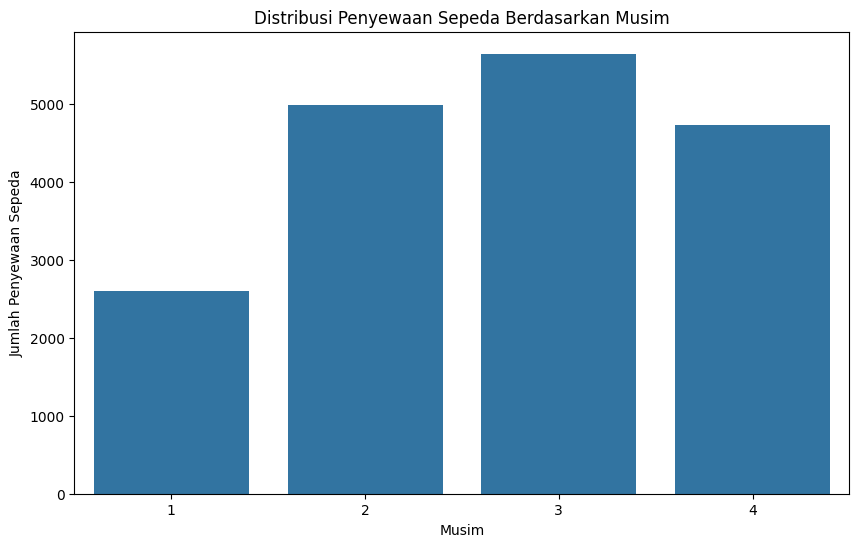

In [52]:
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='cnt', data=day_data, errorbar=None)
plt.title('Distribusi Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

### Pertanyaan 2: Apakah ada korelasi statistik yang signifikan antara suhu/kelembaban dengan jumlah penyewaan sepeda?

Visualisasi hubungan suhu dan kelembaban dengan penyewaan sepeda
dan menyimpan gambar untuk keperluan ui/ux nanti

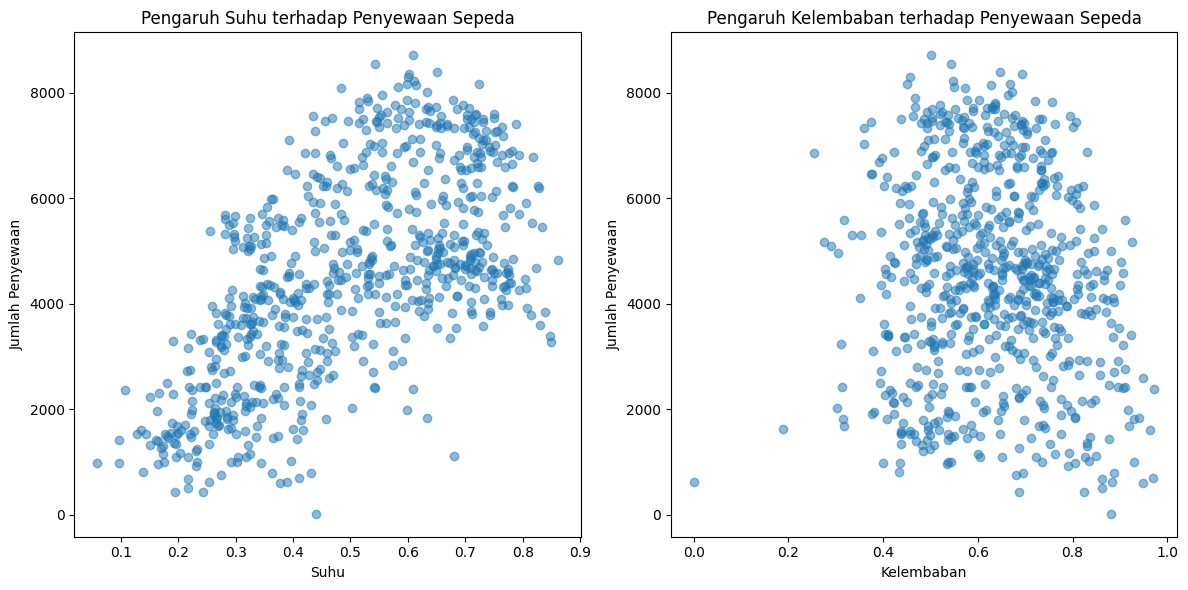

In [53]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(day_data['temp'], day_data['cnt'], alpha=0.5)
plt.title('Pengaruh Suhu terhadap Penyewaan Sepeda')
plt.xlabel('Suhu')
plt.ylabel('Jumlah Penyewaan')

plt.subplot(1, 2, 2)
plt.scatter(day_data['hum'], day_data['cnt'], alpha=0.5)
plt.title('Pengaruh Kelembaban terhadap Penyewaan Sepeda')
plt.xlabel('Kelembaban')
plt.ylabel('Jumlah Penyewaan')

plt.tight_layout()

plt.show()

**Insight:**
- Terdapat Fluktuatif yang konstan pada musim musim tertentu dengan penyewaan sepeda, hal ini membuktikan bahwa musim memiliki pengaruh terkait jumlah penyewaan sepeda.
- Korelasi yang lemah antara suhu dan kelembaban dengan penyewaan sepeda.

## Conclusion

- Conclution pertanyaan 1 : hasil analisis menunjukkan adanya keterkaitan antara musim dan banyaknya penyewaan sepeda. Penyewaan cenderung lebih tinggi di musim semi dan musim panas dibandingkan musim dingin, mengindikasikan bahwa musim memang mempengaruhi jumlah penyewaan sepeda.
- Conclution pertanyaan 2 :  tidak ditemukan korelasi statistik yang signifikan antara suhu atau kelembaban dengan jumlah penyewaan sepeda. Meskipun ada sedikit kecenderungan peningkatan penyewaan pada suhu yang lebih nyaman, hubungan tersebut tidak cukup kuat untuk dianggap signifikan secara statistik.

Dari hasil analisis, bisa disimpulkan kalau musim memang punya pengaruh cukup besar terhadap jumlah penyewaan sepeda, terutama di musim semi dan panas saat cuaca lebih mendukung. Namun, kalau dilihat dari suhu dan kelembaban, pengaruhnya nggak terlalu signifikan. Jadi, faktor lain mungkin juga berperan dalam menentukan seberapa banyak orang menyewa sepeda, seperti hari libur atau tren aktivitas luar ruangan.